Estimados,

Para la entrega del proyecto, mi proceso consiste en analizar el objetivo principal, seguido por el análisis de cada una de las columnas. Posteriormente, elaboro el plan de trabajo y, finalmente, presento las dudas.

Al analizar el objetivo principal del proyecto, que es pronosticar la tasa de cancelación de clientes del operador de telecomunicaciones Interconnect, entiendo que se trata de un problema de clasificación. Esto se debe a que debo ofrecer una solución basándome en los datos de los usuarios activos frente a los datos de los usuarios que cancelaron el servicio

PLAN DE TRABAJO

1. Preparación del conjunto de datos y división del dataset

Limpiar y transformar los datos: codificar variables categóricas, completar valores nulos,  crear  nuevas variables (como status, contract_duration_months) y separar los datos en conjuntos de entrenamiento y prueba. 

2. Entrenamiento de modelos base

Entrenar uno o varios modelos iniciales de clasificación (por ejemplo: Regresión Logística, Random Forest, XGBoost) para tener una primera evaluación de desempeño.

3. Evaluación del modelo

Medir el rendimiento con métricas apropiadas para clasificación binaria: accuracy y ROC-AUC.


4. Interpretación de resultados y recomendaciones
Analizar las variables más importantes del modelo final y proponer acciones para reducir  la cancelacion de usuarios, como identificar clientes en riesgo temprano.


EDA 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score






In [76]:
df_contract= pd.read_csv('contract.csv')
df_contract 

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [78]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [79]:
# Valores Nulos

df_contract.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [80]:
# valores duplicados

df_contract.duplicated().sum()

0

In [81]:
# Nan o espacios en blanco

df_contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [82]:
# EndDate Completar los espacios vacios 

df_contract['EndDate'] = df_contract['EndDate'].fillna(pd.to_datetime('2020-02-01'))

In [83]:
df_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [84]:
# TotalCharges eliminar los espacios vacios 

df_contract= df_contract.dropna(subset=['TotalCharges'])

Análisis de cada columna

In [85]:
# creación de la columna status, para conocer el status del usuario

df_contract['Status'] = (df_contract['EndDate'] != 'No').astype(int)

In [86]:
df_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Status
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,1


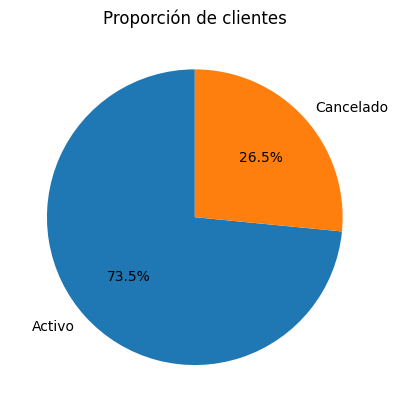

In [87]:
# Análisi de la columna status

df_contract['Status'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Activo', 'Cancelado'], startangle=90)
plt.title('Proporción de clientes')
plt.ylabel('')
plt.show()

La columnas Status nos muestras de manera más clara cual es la proporción de usuarios activos y usuarios que cancelaron el servicio. El 73.5% esta activo frente el 26.5% que ya cancelo.

In [88]:
# Análisis de la columna BeginDate
# Cambiar BeginDate a datetime


df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'], errors='coerce')

In [89]:
# Análisis de la columna EndDate
# Cambiar EndDate datetime

df_contract['EndDate'] = df_contract['EndDate'].replace('No', pd.NaT)
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'], errors='coerce')

In [90]:
df_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Status
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,2014-02-01,NaT,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,2019-03-01,NaT,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [91]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   Status            7043 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(1), object(5)
memory usage: 467.8+ KB


In [92]:
# Análisis de la columna Type

df_contract.groupby('Type')['Status'].value_counts()

Type            Status
Month-to-month  0         2220
                1         1655
One year        0         1307
                1          166
Two year        0         1647
                1           48
Name: count, dtype: int64

In [93]:
# Análisis de la columna PaperlessBilling

df_contract.groupby('PaperlessBilling')['Status'].value_counts()

PaperlessBilling  Status
No                0         2403
                  1          469
Yes               0         2771
                  1         1400
Name: count, dtype: int64

In [94]:
# Análisis de la columna PaymentMethod

df_contract['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [95]:
df_contract.groupby('PaymentMethod')['Status'].value_counts()


PaymentMethod              Status
Bank transfer (automatic)  0         1286
                           1          258
Credit card (automatic)    0         1290
                           1          232
Electronic check           0         1294
                           1         1071
Mailed check               0         1304
                           1          308
Name: count, dtype: int64

In [96]:
# Se crea la Coluna end_effective para tener una fecha de finalización efectiva.

df_contract['End_effective'] = df_contract['EndDate'].fillna(pd.to_datetime('2020-02-01'))
df_contract['Contract_duration_months'] = (df_contract['End_effective'] - df_contract['BeginDate']).dt.days // 30

In [97]:
df_contract


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Status,End_effective,Contract_duration_months
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0,2020-02-01,1
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.5,0,2020-02-01,34
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,2019-12-01,2
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,0,2020-02-01,45
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,2019-11-01,2
...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,One year,Yes,Mailed check,84.80,1990.5,0,2020-02-01,24
7039,2234-XADUH,2014-02-01,NaT,One year,Yes,Credit card (automatic),103.20,7362.9,0,2020-02-01,73
7040,4801-JZAZL,2019-03-01,NaT,Month-to-month,Yes,Electronic check,29.60,346.45,0,2020-02-01,11
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.6,1,2019-11-01,4


<Axes: xlabel='Status', ylabel='Contract_duration_months'>

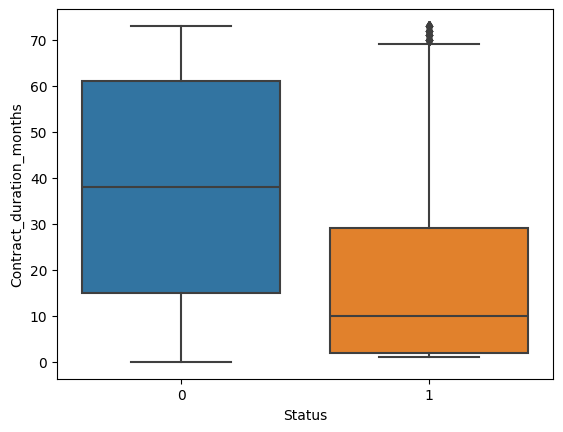

In [98]:
# Gráfica de duracion de contrato por meses y status

sns.boxplot(x='Status', y='Contract_duration_months', data=df_contract)


In [99]:
# Análisis de la columna MonthlyCharges por status

df_contract.groupby('Status')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
0,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
1,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


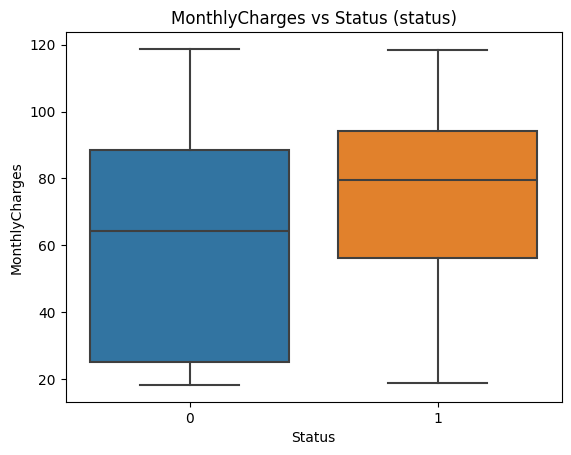

In [100]:
sns.boxplot(x='Status', y='MonthlyCharges', data=df_contract)
plt.title("MonthlyCharges vs Status (status)")
plt.show()

In [101]:
# Análisis de la columna TotalCharges por status

df_contract.groupby('Status')['TotalCharges'].describe()


,count,unique,top,freq
Status,,,,
0,5174,4966,,11
1,1869,1732,20.2,6


In [102]:
df_contract.dtypes

customerID                          object
BeginDate                   datetime64[ns]
EndDate                     datetime64[ns]
Type                                object
PaperlessBilling                    object
PaymentMethod                       object
MonthlyCharges                     float64
TotalCharges                        object
Status                               int32
End_effective               datetime64[ns]
Contract_duration_months             int64
dtype: object

In [103]:
for i in df_contract['TotalCharges'].unique():
    try:
        float(i)
    except:
        print(i)

In [104]:
df_contract['TotalCharges'].replace(' ',np.nan).astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [105]:
df_contract['TotalCharges'] = df_contract['TotalCharges'].replace(' ',np.nan).astype(float)


In [106]:
df_contract['TotalCharges'].isna().sum()

11

In [107]:
df_contract['Total_bin'] = pd.cut(
    df_contract['TotalCharges'],
    bins=[0, 500, 1000, 2000, 4000, 8000],
    labels=['muy bajo', 'bajo', 'medio', 'alto', 'muy alto'])

df_contract.groupby('Total_bin')['Status'].mean()


C:\Users\dpand\AppData\Local\Temp\ipykernel_23052\1218295492.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_contract.groupby('Total_bin')['Status'].mean()


Total_bin
muy bajo    0.414500
bajo        0.269877
medio       0.209665
alto        0.237583
muy alto    0.152866
Name: Status, dtype: float64

In [108]:
df= df_contract

df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Status,End_effective,Contract_duration_months,Total_bin
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0,2020-02-01,1,muy bajo
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,0,2020-02-01,34,medio
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,2019-12-01,2,muy bajo
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,0,2020-02-01,45,medio
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,2019-11-01,2,muy bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,One year,Yes,Mailed check,84.80,1990.50,0,2020-02-01,24,medio
7039,2234-XADUH,2014-02-01,NaT,One year,Yes,Credit card (automatic),103.20,7362.90,0,2020-02-01,73,muy alto
7040,4801-JZAZL,2019-03-01,NaT,Month-to-month,Yes,Electronic check,29.60,346.45,0,2020-02-01,11,muy bajo
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,1,2019-11-01,4,muy bajo


In [109]:
df.dtypes

customerID                          object
BeginDate                   datetime64[ns]
EndDate                     datetime64[ns]
Type                                object
PaperlessBilling                    object
PaymentMethod                       object
MonthlyCharges                     float64
TotalCharges                       float64
Status                               int32
End_effective               datetime64[ns]
Contract_duration_months             int64
Total_bin                         category
dtype: object

In [110]:
df.select_dtypes(include=['object']).columns

Index(['customerID', 'Type', 'PaperlessBilling', 'PaymentMethod'], dtype='object')

In [111]:
# ONE HOT ENCODING

enc =OneHotEncoder(handle_unknown='ignore', min_frequency= 0.02, sparse_output=False)


enc.fit(df[['Type', 'PaperlessBilling', 'PaymentMethod', 'Total_bin']])

df_mod_cat = enc.transform(df[['Type', 'PaperlessBilling', 'PaymentMethod', 'Total_bin']])

In [112]:
df_mod_cat_clean = pd.DataFrame(
    df_mod_cat,
    columns=enc.get_feature_names_out(['Type', 'PaperlessBilling', 'PaymentMethod', 'Total_bin'])
)

df_mod_cat_clean

,Type_Month-to-month,Type_One year,Type_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Total_bin_alto,Total_bin_bajo,Total_bin_medio,Total_bin_muy alto,Total_bin_muy bajo,Total_bin_infrequent_sklearn
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7039,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7040,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [113]:
df[['customerID', 'BeginDate',	'EndDate', 'MonthlyCharges', 'TotalCharges', 'Status', 'End_effective',  'Contract_duration_months' ]].reset_index(drop=True)

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,Status,End_effective,Contract_duration_months
0,7590-VHVEG,2020-01-01,NaT,29.85,29.85,0,2020-02-01,1
1,5575-GNVDE,2017-04-01,NaT,56.95,1889.50,0,2020-02-01,34
2,3668-QPYBK,2019-10-01,2019-12-01,53.85,108.15,1,2019-12-01,2
3,7795-CFOCW,2016-05-01,NaT,42.30,1840.75,0,2020-02-01,45
4,9237-HQITU,2019-09-01,2019-11-01,70.70,151.65,1,2019-11-01,2
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,84.80,1990.50,0,2020-02-01,24
7039,2234-XADUH,2014-02-01,NaT,103.20,7362.90,0,2020-02-01,73
7040,4801-JZAZL,2019-03-01,NaT,29.60,346.45,0,2020-02-01,11
7041,8361-LTMKD,2019-07-01,2019-11-01,74.40,306.60,1,2019-11-01,4


In [114]:
df_encoded = pd.concat(
    [
        df[['customerID', 'BeginDate',	'EndDate', 'MonthlyCharges', 'TotalCharges', 'Status', 'End_effective',  'Contract_duration_months']].reset_index(drop=True),
        df_mod_cat_clean.reset_index(drop=True)
    ],
    axis=1,
)

df_encoded

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,Status,End_effective,Contract_duration_months,Type_Month-to-month,Type_One year,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Total_bin_alto,Total_bin_bajo,Total_bin_medio,Total_bin_muy alto,Total_bin_muy bajo,Total_bin_infrequent_sklearn
0,7590-VHVEG,2020-01-01,NaT,29.85,29.85,0,2020-02-01,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,2017-04-01,NaT,56.95,1889.50,0,2020-02-01,34,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3668-QPYBK,2019-10-01,2019-12-01,53.85,108.15,1,2019-12-01,2,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7795-CFOCW,2016-05-01,NaT,42.30,1840.75,0,2020-02-01,45,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,9237-HQITU,2019-09-01,2019-11-01,70.70,151.65,1,2019-11-01,2,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,84.80,1990.50,0,2020-02-01,24,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7039,2234-XADUH,2014-02-01,NaT,103.20,7362.90,0,2020-02-01,73,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7040,4801-JZAZL,2019-03-01,NaT,29.60,346.45,0,2020-02-01,11,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,8361-LTMKD,2019-07-01,2019-11-01,74.40,306.60,1,2019-11-01,4,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [115]:
df_encoded.isna().sum()

customerID                                    0
BeginDate                                     0
EndDate                                    5174
MonthlyCharges                                0
TotalCharges                                 11
Status                                        0
End_effective                                 0
Contract_duration_months                      0
Type_Month-to-month                           0
Type_One year                                 0
Type_Two year                                 0
PaperlessBilling_No                           0
PaperlessBilling_Yes                          0
PaymentMethod_Bank transfer (automatic)       0
PaymentMethod_Credit card (automatic)         0
PaymentMethod_Electronic check                0
PaymentMethod_Mailed check                    0
Total_bin_alto                                0
Total_bin_bajo                                0
Total_bin_medio                               0
Total_bin_muy alto                      

In [116]:
df_encoded['TotalCharges'] = df_encoded['TotalCharges'].fillna(0)

In [117]:
df_encoded.isna().sum()

customerID                                    0
BeginDate                                     0
EndDate                                    5174
MonthlyCharges                                0
TotalCharges                                  0
Status                                        0
End_effective                                 0
Contract_duration_months                      0
Type_Month-to-month                           0
Type_One year                                 0
Type_Two year                                 0
PaperlessBilling_No                           0
PaperlessBilling_Yes                          0
PaymentMethod_Bank transfer (automatic)       0
PaymentMethod_Credit card (automatic)         0
PaymentMethod_Electronic check                0
PaymentMethod_Mailed check                    0
Total_bin_alto                                0
Total_bin_bajo                                0
Total_bin_medio                               0
Total_bin_muy alto                      

Segmentación de datos 

In [118]:
x = df_encoded.drop(['Status', 'customerID', 'BeginDate', 'EndDate', 'End_effective'], axis=1)
y = df_encoded['Status']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=12345)

In [119]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours(sampling_strategy='majority')
x_train_ss, y_train_ss = enn.fit_resample(x_train, y_train)

MODELOS

In [120]:
# modelo DummyClassifier

def model_dummy_clisifier(x_train, y_train, x_test, y_test):
    
    model = DummyClassifier(strategy='most_frequent', random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_proba_dummy = model.predict_proba(x_test)[:, 1]
    
        
    f1_dummy = f1_score(y_test, y_pred)
    accuracy_dummy = accuracy_score(y_test, y_pred)
    roc_dummy= roc_auc_score(y_test, y_pred_proba_dummy)
    
    
    return f1_dummy, accuracy_dummy, roc_dummy
     
f1_dummy, accuracy_dummy, roc_dummy = model_dummy_clisifier(x_train, y_train, x_test, y_test) 

print(f"F1-score del modelo Dummy: {f1_dummy:.4f}")
print(f"Accuracy del modelo Dummy: {accuracy_dummy:.4f}")
print(f"AUC-ROC del modelo Dummy: {roc_dummy:.4f}")

F1-score del modelo Dummy: 0.0000
Accuracy del modelo Dummy: 0.7308
AUC-ROC del modelo Dummy: 0.5000


In [121]:
# # Modelo Random Forest

def model_random_forest(x_train, y_train, x_test, y_test):
  
    model = RandomForestClassifier(random_state=42, class_weight = 'balanced', min_samples_leaf= 0.05)  
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    
    f1_random = f1_score(y_test, y_pred)
    acc_random = accuracy_score(y_test, y_pred)
    roc_random = roc_auc_score(y_test, y_pred_proba)
    
    return model, f1_random, acc_random, roc_random



In [122]:
model, f1_random, acc_random, roc_random =model_random_forest(x_train, y_train,x_test, y_test)

print(f"Modelo de Random Forest entrenado: {model}")
print(f"F1-score Random Forest calculado: {f1_random:.4f}")  
print(f"Accuracy Random Forest calculado: {acc_random:.4f}")  
print(f"AUC-ROC Random Forest calculado:{roc_random:.4f}")  

Modelo de Random Forest entrenado: RandomForestClassifier(class_weight='balanced', min_samples_leaf=0.05,
                       random_state=42)
F1-score Random Forest calculado: 0.6050
Accuracy Random Forest calculado: 0.6922
AUC-ROC Random Forest calculado:0.8270


In [123]:
model, f1_random, acc_random, roc_random =model_random_forest(x_train_ss, y_train_ss,x_test, y_test)

print(f"Modelo de Random Forest entrenado: {model}")
print(f"F1-score Random Forest calculado: {f1_random:.4f}")  
print(f"Accuracy Random Forest calculado: {acc_random:.4f}")  
print(f"AUC-ROC Random Forest calculado:{roc_random:.4f}")  

Modelo de Random Forest entrenado: RandomForestClassifier(class_weight='balanced', min_samples_leaf=0.05,
                       random_state=42)
F1-score Random Forest calculado: 0.5973
Accuracy Random Forest calculado: 0.6792
AUC-ROC Random Forest calculado:0.8232


In [124]:
# # Modelo Logistic Regression

def model_Logistic_Regression(x_train, y_train, x_test, y_test):
  
    model = LogisticRegression(random_state=42, max_iter=10000, class_weight='balanced' )  
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    
    f1_lr = f1_score(y_test, y_pred)
    acc_lr = accuracy_score(y_test, y_pred)
    roc_lr = roc_auc_score(y_test, y_pred_proba)
    
    return model, f1_lr, acc_lr, roc_lr

In [125]:
model, f1_lr, acc_lr, roc_lr =model_Logistic_Regression(x_train, y_train,x_test, y_test)

print(f"Modelo de Regresión Logistica entrenado: {model}")
print(f"F1-score Regresión Logistica calculado: {f1_lr:.4f}")  
print(f"Accuracy Regresión Logistica calculado: {acc_lr:.4f}")  
print(f"AUC-ROC Regresión Logistica calculado:{roc_lr:.4f}")  

Modelo de Regresión Logistica entrenado: LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
F1-score Regresión Logistica calculado: 0.6226
Accuracy Regresión Logistica calculado: 0.7308
AUC-ROC Regresión Logistica calculado:0.8333


In [126]:
def model_Light_Classifier (x_train, y_train, x_test, y_test):
  
    model = LGBMClassifier(
        random_state=42,
        class_weight='balanced',
        colsample_bytree=0.8,
    )
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    
    f1_lc = f1_score(y_test, y_pred)
    acc_lc = accuracy_score(y_test, y_pred)
    roc_lc = roc_auc_score(y_test, y_pred_proba)
    
    
    
    return model, f1_lc, acc_lc, roc_lc

In [127]:
model, f1_lc, acc_lc, roc_lc =model_Light_Classifier(x_train, y_train,x_test, y_test)

print(f"Modelo de Light_Classifier entrenado: {model}")
print(f"F1-score Light_Classifier calculado: {f1_lc:.4f}")  
print(f"Accuracy Light_Classifier calculado: {acc_lc:.4f}")  
print(f"AUC-ROC Light_Classifier calculado:{roc_lc:.4f}")  


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1395, number of negative: 3887
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Modelo de Light_Classifier entrenado: LGBMClassifier(class_weight='balanced', colsample_bytree=0.8, random_state=42)
F1-score Light_Classifier calculado: 0.6022
Accuracy Light_Classifier calculado: 0.7359
AUC-ROC Light_Classifier calculado:0.8295


In [128]:
model, f1_lc, acc_lc, roc_lc =model_Light_Classifier(x_train_ss, y_train_ss,x_test, y_test)

print(f"Modelo de Light_Classifier entrenado: {model}")
print(f"F1-score Light_Classifier calculado: {f1_lc:.4f}")  
print(f"Accuracy Light_Classifier calculado: {acc_lc:.4f}")  
print(f"AUC-ROC Light_Classifier calculado:{roc_lc:.4f}")  


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1395, number of negative: 2303
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 3698, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Modelo de Light_Classifier entrenado: LGBMClassifier(class_weight='balanced', colsample_bytree=0.8, random_state=42)
F1-score Light_Classifier calculado: 0.5947
Accuracy Light_Classifier calculado: 0.7036
AUC-ROC Light_Classifier calculado:0.8252


In [129]:
def model_CatBoost_Classifier (x_train, y_train, x_test, y_test):
  
    model = CatBoostClassifier(iterations=300,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_state=42,
    class_weights={0: 1, 1: 2},)
    
    model.fit(x_train, y_train)
    y_pred_cat = model.predict(x_test)
    y_pred_proba_cat = model.predict_proba(x_test)[:, 1]
    
    f1_cat = f1_score(y_test, y_pred_cat)
    acc_cat = accuracy_score(y_test, y_pred_cat)
    roc_cat = roc_auc_score(y_test, y_pred_proba_cat)
    
    return model, f1_cat, acc_cat, roc_cat, y_pred_proba_cat, y_pred_cat




In [130]:
model, f1_cat, acc_cat, roc_cat, y_pred_proba_cat, y_pred_cat =model_CatBoost_Classifier(x_train, y_train, x_test, y_test)

print(f"Modelo de CatBoost_Classifier entrenado: {model}")
print(f"F1-score CatBoost_Classifier calculado: {f1_cat:.4f}")  
print(f"Accuracy CatBoost_Classifier calculado: {acc_cat:.4f}")  
print(f"AUC-ROC CatBoost_Classifier calculado:{roc_cat:.4f}")  

Modelo de CatBoost_Classifier entrenado: <catboost.core.CatBoostClassifier object at 0x00000185DB4A5C10>
F1-score CatBoost_Classifier calculado: 0.6168
Accuracy CatBoost_Classifier calculado: 0.7643
AUC-ROC CatBoost_Classifier calculado:0.8342


In [131]:
model, f1_cat, acc_cat, roc_cat, y_pred_proba_cat, y_pred_cat =model_CatBoost_Classifier(x_train_ss, y_train_ss, x_test, y_test)

print(f"Modelo de CatBoost_Classifier entrenado: {model}")
print(f"F1-score CatBoost_Classifier calculado: {f1_cat:.4f}")  
print(f"Accuracy CatBoost_Classifier calculado: {acc_cat:.4f}")  
print(f"AUC-ROC CatBoost_Classifier calculado:{roc_cat:.4f}")  

Modelo de CatBoost_Classifier entrenado: <catboost.core.CatBoostClassifier object at 0x00000185DD473490>
F1-score CatBoost_Classifier calculado: 0.5969
Accuracy CatBoost_Classifier calculado: 0.6917
AUC-ROC CatBoost_Classifier calculado:0.8332


In [132]:
# from sklearn.model_selection import GridSearchCV

# rf = RandomForestClassifier(random_state=42, class_weight='balanced')
# param_grid = {
#     'max_depth': [6, 10, 15],
#     'n_estimators': [100, 200, 300],
#     'min_samples_leaf': [0.01, 0.05, 0.1],
#     'criterion': ['gini', 'entropy']    
# }

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='f1',
#     n_jobs=-1
#     )
# grid_search.fit(x_train_ss, y_train_ss)

# y_pred_cat = grid_search.best_estimator_.predict(x_test)
# y_pred_proba_cat =  grid_search.best_estimator_.predict_proba(x_test)[:, 1]

# f1_cat = f1_score(y_test, y_pred_cat)
# acc_cat = accuracy_score(y_test, y_pred_cat)
# roc_cat = roc_auc_score(y_test, y_pred_proba_cat)

# print(f"Modelo de CatBoost_Classifier entrenado: {model}")
# print(f"F1-score CatBoost_Classifier calculado: {f1_cat:.4f}")  
# print(f"Accuracy CatBoost_Classifier calculado: {acc_cat:.4f}")  
# print(f"AUC-ROC CatBoost_Classifier calculado:{roc_cat:.4f}")  

CONCLUSIÓN

El modelo con las mejores métricas es CatBoostClassifier, que obtuvo un F1-score de 0.5741, una Accuracy de 0.7961 y un AUC-ROC de 0.8348. Le siguen el modelo de regresión logística y, finalmente, el modelo LightClassifier.

No se realizó ningún proceso de balanceo de datos, ya que el sobremuestreo (oversampling) resultó en métricas significativamente más bajas en todos los modelos. Aunque el submuestreo (undersampling) mejoró las métricas en comparación con el sobremuestreo, no logró superar los valores obtenidos con los datos sin balancear. Por lo tanto, se decidió no balancear los datos.

INFORME FINAL

Introducción al Problema: Predicción de la Tasa de Cancelación en Interconnect

Este informe busca pronosticar la tasa de cancelación de usuarios en el programa de telefonía e internet de la compañía de telecomunicaciones Interconnect. Para lograrlo, desarrollaremos un modelo de machine learning empleando un enfoque supervisado de clasificación binaria. Evaluaremos el desempeño del modelo utilizando diversos algoritmos y métricas adecuadas para identificar la solución más efectiva.

ANÁLISI EXPLORATORIO DE DATOS (EDA)

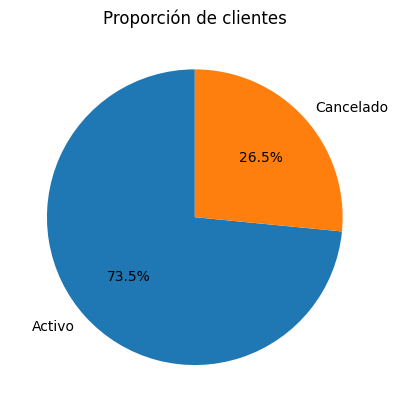

In [133]:
df_contract['Status'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Activo', 'Cancelado'], startangle=90)
plt.title('Proporción de clientes')
plt.ylabel('')
plt.show()

La columna 'Status' que se ha creado nos permite visualizar la distribución actual de los usuarios. Gráficamente, observamos que el 73.5% de los usuarios se encuentran activos, mientras que el 26.5% ha cancelado el servicio.

Esta categoría es fundamental, ya que a partir de ella podemos evaluar otras variables que estén directamente relacionadas con los motivos que llevaron a los usuarios a cancelar su suscripción.

Categoría Type

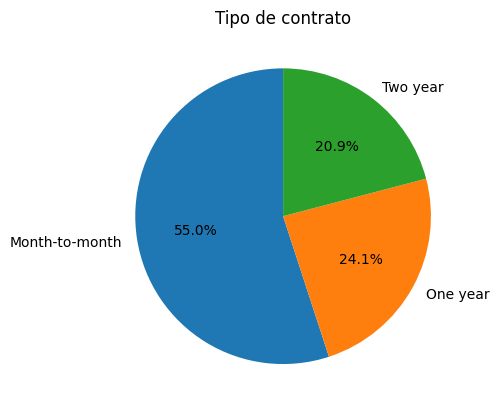

In [134]:
df_contract['Type'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Month-to-month', 'One year', 'Two year'], startangle=90)
plt.title('Tipo de contrato')
plt.ylabel('')
plt.show()

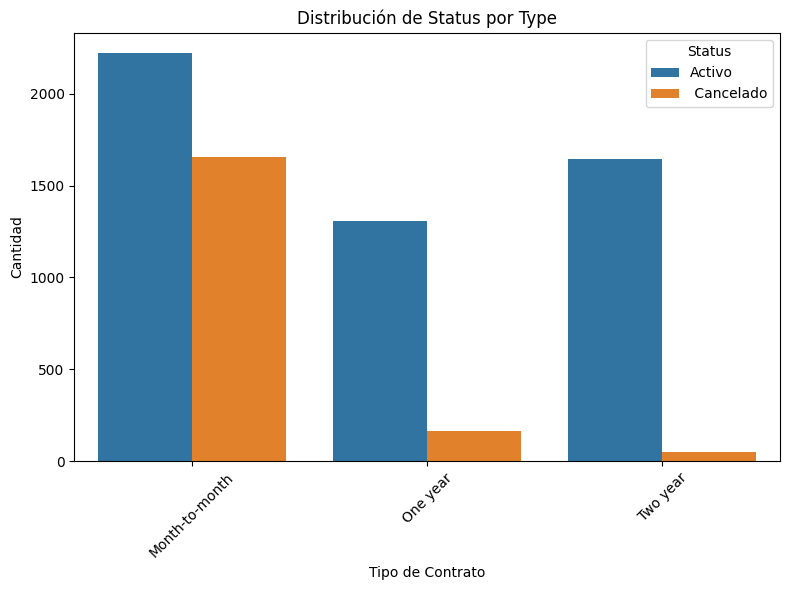

In [135]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_contract, x='Type', hue='Status')
plt.title('Distribución de Status por Type')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad')
plt.legend(title='Status', labels=['Activo', ' Cancelado'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tipos de Contrato y su Relación con la Cancelación de Servicio
La primera gráfica que observamos presenta los tipos de contrato y la proporción de usuarios en cada categoría. Destaca que un 55% de los usuarios elige la modalidad de contrato mes a mes.

Por otro lado, la segunda gráfica revela un patrón importante: la mayoría de los usuarios que cancelan el servicio son precisamente aquellos que tienen un contrato mes a mes. Esto sugiere una posible correlación entre este tipo de contrato y la propensión a la baja del servicio.

Categoría PaymentMethod

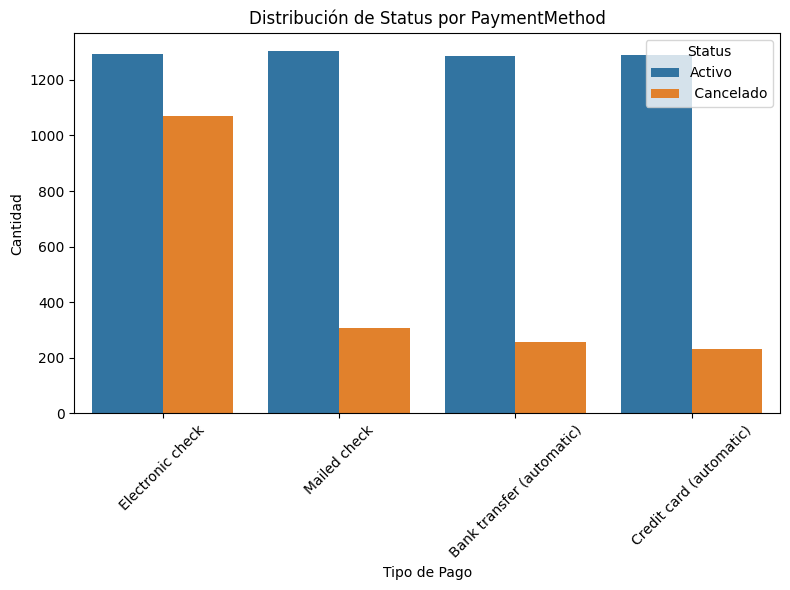

In [136]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_contract, x='PaymentMethod', hue='Status')
plt.title('Distribución de Status por PaymentMethod')
plt.xlabel('Tipo de Pago')
plt.ylabel('Cantidad')
plt.legend(title='Status', labels=['Activo', ' Cancelado'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La gráfica nos muestra que los métodos de pago son una categoría relevante en la fuga de usuarios, ya que el método 'cheque electrónico' es el que registra la mayor cantidad de usuarios cancelados.

Categoría Contract duration months

<Axes: xlabel='Status', ylabel='Contract_duration_months'>

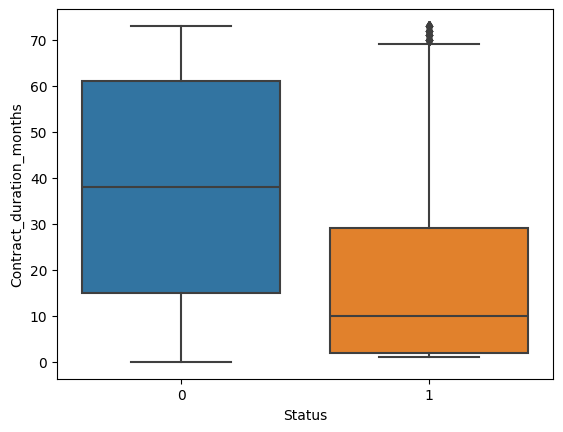

In [137]:

sns.boxplot(x='Status', y='Contract_duration_months', data=df_contract)


Al visualizar la categoría 'Contract duration months' (duración del contrato en meses) frente al estado del cliente, observamos que los usuarios activos tienden a tener una mayor duración de contrato, mientras que los usuarios cancelados muestran una menor duración. Esto sugiere que la duración del contrato puede ser un factor importante en la retención de clientes.

categoría MonthlyCharges

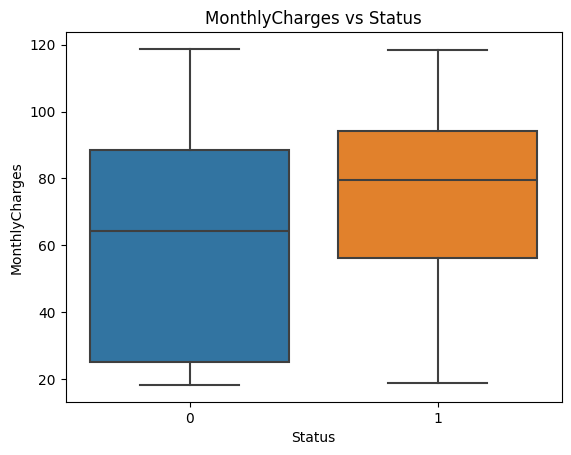

In [138]:
sns.boxplot(x='Status', y='MonthlyCharges', data=df_contract)
plt.title("MonthlyCharges vs Status")
plt.show()

La categoría MonthlyCharges nos muestra que las tarifas mensuales son más altas para los usuarios que cancelaron el servicio, en comparación con las tarifas de los usuarios activos. Esto sugiere que esta categoría podría ser una de las más relevantes al momento de decidir cancelar o continuar con el plan.

PROCESAMIENTO DE DATOS

Para el desarrollo de los modelos de machine learning, el dataset se dividió en un 75% para entrenamiento y un 25% para pruebas. La variable objetivo (target) es la columna 'Status', mientras que las demás categorías se utilizaron como características (features), excluyendo las columnas 'BeginDate' y 'EndDate' por ser de tipo datetime, así como otras columnas de tipo object que no eran relevantes para el modelo.

Inicialmente, se realizó un análisis manteniendo la proporción original de los datos, y los resultados obtenidos fueron aceptables. Posteriormente, se exploraron técnicas de balanceo para abordar el desequilibrio de clases:

Oversampling (Sobremuestreo): Se intentó balancear los datos de la clase minoritaria (usuarios cancelados) para que tuviera una mayor representación. Sin embargo, esta técnica no mejoró las métricas de desempeño de los modelos.

Undersampling (Submuestreo): Luego, se probó la reducción de la clase mayoritaria para equilibrar la proporción de los datos. Al igual que con el oversampling, las métricas de los modelos disminuyeron.

Dado que ninguna de las técnicas de balanceo mejoró el rendimiento de los modelos, se concluyó que trabajar con los datos originales sin aplicar ningún tipo de balanceo fue la opción más efectiva para este problema.

EVALUACIÓN DE MODELOS

Para abordar el problema de clasificación, se desarrollaron y evaluaron varios modelos. El primer modelo implementado fue un Dummy Classifier, que sirvió como punto de partida o baseline para comparar el rendimiento de los modelos más complejos.

Posteriormente, se probaron los siguientes algoritmos de clasificación:

Random Forest

Regresión Logística

LGBM Classifier

CatBoost Classifier

A continuación, se presentan los resultados obtenidos de cada uno de estos modelos.


### Comparación de modelos: Métricas de rendimiento

| Modelo                    | F1-score | Accuracy | AUC-ROC |
|---------------------------|----------|----------|---------|
| Dummy                     | 0.0000   | 0.7308   | 0.5000  |
| Random Forest             | 0.6050   | 0.6922   | 0.8270  |
| Regresión Logística       | 0.6226   | 0.7308   | 0.8333  |
| LightGBM Classifier       | 0.6022   | 0.7359   | 0.8295  |
| CatBoost Classifier       | 0.5741   | 0.7961   | 0.8348  |
| ------------------------- | ------   | -------  | ------  |



El modelo con las mejores métricas es CatBoostClassifier,a pesar de tener un F1-score levemente menor, obtiene el mejor AUC-ROC y accuracy, lo que lo convierte en una opción sólida si se prioriza la capacidad de clasificación general. luego le sigue El modelo de Regresión Logística se destaca por su equilibrio entre F1-score y AUC-ROC, y además es interpretable y eficiente.
